In [93]:
# import spark sql and functions
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [94]:
spark = SparkSession.builder.master('local[16]').getOrCreate()

In [95]:
# read products_table.csv
products = spark.read.csv('../Data/product_table.csv', header=True, inferSchema=True)

# schema
products.printSchema()

root
 |-- UPC: long (nullable = true)
 |-- DESCRIPTION: string (nullable = true)
 |-- MANUFACTURER: string (nullable = true)
 |-- CATEGORY: string (nullable = true)
 |-- SUB_CATEGORY: string (nullable = true)
 |-- PRODUCT_SIZE: string (nullable = true)



In [96]:
# store_table.csv
store = spark.read.csv('../Data/store_table.csv', header=True, inferSchema=True)

# schema
store.printSchema()

root
 |-- STORE_ID: integer (nullable = true)
 |-- STORE_NAME: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- MSA: integer (nullable = true)
 |-- SEGMENT: string (nullable = true)
 |-- PARKING: integer (nullable = true)
 |-- SIZE: integer (nullable = true)
 |-- AVG_WEEKLY_BASKETS: integer (nullable = true)
 |-- _c9: string (nullable = true)



In [97]:
# Drop _c9 column
store = store.drop('_c9')

In [98]:
# transactions_table.csv
transactions = spark.read.csv('../Data/transaction_table.csv', header=True, inferSchema=True)

In [99]:
# schema
transactions.printSchema()

root
 |-- WEEK_END_DATE: string (nullable = true)
 |-- STORE_NUM: integer (nullable = true)
 |-- UPC: long (nullable = true)
 |-- UNITS: integer (nullable = true)
 |-- VISITS: integer (nullable = true)
 |-- HHS: integer (nullable = true)
 |-- SPEND: double (nullable = true)
 |-- PRICE: double (nullable = true)
 |-- BASE_PRICE: double (nullable = true)
 |-- FEATURE: integer (nullable = true)
 |-- DISPLAY: integer (nullable = true)
 |-- TPR_ONLY: integer (nullable = true)



In [100]:
# Left join products and transactions
products_transactions = products.join(transactions, products.UPC == transactions.UPC, how='left')

# head
products_transactions.show(5)

+----------+--------------------+-------------+----------+------------+------------+-------------+---------+----------+-----+------+---+------+-----+----------+-------+-------+--------+
|       UPC|         DESCRIPTION| MANUFACTURER|  CATEGORY|SUB_CATEGORY|PRODUCT_SIZE|WEEK_END_DATE|STORE_NUM|       UPC|UNITS|VISITS|HHS| SPEND|PRICE|BASE_PRICE|FEATURE|DISPLAY|TPR_ONLY|
+----------+--------------------+-------------+----------+------------+------------+-------------+---------+----------+-----+------+---+------+-----+----------+-------+-------+--------+
|1111009477|PL MINI TWIST PRE...|PRIVATE LABEL|BAG SNACKS|    PRETZELS|       15 OZ|    14-Jan-09|      367|1111009477|   13|    13| 13| 18.07| 1.39|      1.57|      0|      0|       1|
|1111009477|PL MINI TWIST PRE...|PRIVATE LABEL|BAG SNACKS|    PRETZELS|       15 OZ|    14-Jan-09|      387|1111009477|  111|    98| 94|154.29| 1.39|      1.39|      0|      0|       0|
|1111009477|PL MINI TWIST PRE...|PRIVATE LABEL|BAG SNACKS|    PRETZELS

In [101]:
# schema
products_transactions.printSchema()

root
 |-- UPC: long (nullable = true)
 |-- DESCRIPTION: string (nullable = true)
 |-- MANUFACTURER: string (nullable = true)
 |-- CATEGORY: string (nullable = true)
 |-- SUB_CATEGORY: string (nullable = true)
 |-- PRODUCT_SIZE: string (nullable = true)
 |-- WEEK_END_DATE: string (nullable = true)
 |-- STORE_NUM: integer (nullable = true)
 |-- UPC: long (nullable = true)
 |-- UNITS: integer (nullable = true)
 |-- VISITS: integer (nullable = true)
 |-- HHS: integer (nullable = true)
 |-- SPEND: double (nullable = true)
 |-- PRICE: double (nullable = true)
 |-- BASE_PRICE: double (nullable = true)
 |-- FEATURE: integer (nullable = true)
 |-- DISPLAY: integer (nullable = true)
 |-- TPR_ONLY: integer (nullable = true)



In [102]:
# Left join products_transactions and store, store_id == store_num
products_transactions_store = products_transactions.join(store, products_transactions.STORE_NUM == store.STORE_ID, how='left')

# head
products_transactions_store.show(5)

+----------+--------------------+-------------+----------+------------+------------+-------------+---------+----------+-----+------+---+------+-----+----------+-------+-------+--------+--------+--------------+---------+-----+-----+----------+-------+-----+------------------+
|       UPC|         DESCRIPTION| MANUFACTURER|  CATEGORY|SUB_CATEGORY|PRODUCT_SIZE|WEEK_END_DATE|STORE_NUM|       UPC|UNITS|VISITS|HHS| SPEND|PRICE|BASE_PRICE|FEATURE|DISPLAY|TPR_ONLY|STORE_ID|    STORE_NAME|     CITY|STATE|  MSA|   SEGMENT|PARKING| SIZE|AVG_WEEKLY_BASKETS|
+----------+--------------------+-------------+----------+------------+------------+-------------+---------+----------+-----+------+---+------+-----+----------+-------+-------+--------+--------+--------------+---------+-----+-----+----------+-------+-----+------------------+
|1111009477|PL MINI TWIST PRE...|PRIVATE LABEL|BAG SNACKS|    PRETZELS|       15 OZ|    14-Jan-09|      367|1111009477|   13|    13| 13| 18.07| 1.39|      1.57|      0|    

In [103]:
# schema
products_transactions_store.printSchema()

root
 |-- UPC: long (nullable = true)
 |-- DESCRIPTION: string (nullable = true)
 |-- MANUFACTURER: string (nullable = true)
 |-- CATEGORY: string (nullable = true)
 |-- SUB_CATEGORY: string (nullable = true)
 |-- PRODUCT_SIZE: string (nullable = true)
 |-- WEEK_END_DATE: string (nullable = true)
 |-- STORE_NUM: integer (nullable = true)
 |-- UPC: long (nullable = true)
 |-- UNITS: integer (nullable = true)
 |-- VISITS: integer (nullable = true)
 |-- HHS: integer (nullable = true)
 |-- SPEND: double (nullable = true)
 |-- PRICE: double (nullable = true)
 |-- BASE_PRICE: double (nullable = true)
 |-- FEATURE: integer (nullable = true)
 |-- DISPLAY: integer (nullable = true)
 |-- TPR_ONLY: integer (nullable = true)
 |-- STORE_ID: integer (nullable = true)
 |-- STORE_NAME: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- MSA: integer (nullable = true)
 |-- SEGMENT: string (nullable = true)
 |-- PARKING: integer (nullable = true)
 |-- S

In [104]:
# Drop similar columns
products_transactions_store = products_transactions_store.drop('UPC', 'STORE_NUM', 'STORE_ID')

# head
products_transactions_store.show(5)

+--------------------+-------------+----------+------------+------------+-------------+-----+------+---+------+-----+----------+-------+-------+--------+--------------+---------+-----+-----+----------+-------+-----+------------------+
|         DESCRIPTION| MANUFACTURER|  CATEGORY|SUB_CATEGORY|PRODUCT_SIZE|WEEK_END_DATE|UNITS|VISITS|HHS| SPEND|PRICE|BASE_PRICE|FEATURE|DISPLAY|TPR_ONLY|    STORE_NAME|     CITY|STATE|  MSA|   SEGMENT|PARKING| SIZE|AVG_WEEKLY_BASKETS|
+--------------------+-------------+----------+------------+------------+-------------+-----+------+---+------+-----+----------+-------+-------+--------+--------------+---------+-----+-----+----------+-------+-----+------------------+
|PL MINI TWIST PRE...|PRIVATE LABEL|BAG SNACKS|    PRETZELS|       15 OZ|    14-Jan-09|   13|    13| 13| 18.07| 1.39|      1.57|      0|      0|       1|15TH & MADISON|COVINGTON|   KY|17140|     VALUE|    196|24721|             12707|
|PL MINI TWIST PRE...|PRIVATE LABEL|BAG SNACKS|    PRETZELS|

In [105]:
# shape of the data
print((products_transactions_store.count(), len(products_transactions_store.columns)))

(538662, 23)


In [106]:
# drop any duplicates
products_transactions_store = products_transactions_store.dropDuplicates()

# shape of the data
print((products_transactions_store.count(), len(products_transactions_store.columns)))

(538647, 23)


In [107]:
# schema
products_transactions_store.printSchema()

root
 |-- DESCRIPTION: string (nullable = true)
 |-- MANUFACTURER: string (nullable = true)
 |-- CATEGORY: string (nullable = true)
 |-- SUB_CATEGORY: string (nullable = true)
 |-- PRODUCT_SIZE: string (nullable = true)
 |-- WEEK_END_DATE: string (nullable = true)
 |-- UNITS: integer (nullable = true)
 |-- VISITS: integer (nullable = true)
 |-- HHS: integer (nullable = true)
 |-- SPEND: double (nullable = true)
 |-- PRICE: double (nullable = true)
 |-- BASE_PRICE: double (nullable = true)
 |-- FEATURE: integer (nullable = true)
 |-- DISPLAY: integer (nullable = true)
 |-- TPR_ONLY: integer (nullable = true)
 |-- STORE_NAME: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- MSA: integer (nullable = true)
 |-- SEGMENT: string (nullable = true)
 |-- PARKING: integer (nullable = true)
 |-- SIZE: integer (nullable = true)
 |-- AVG_WEEKLY_BASKETS: integer (nullable = true)



In [108]:
# make column names lowercase
products_transactions_store = products_transactions_store.toDF(*[c.lower() for c in products_transactions_store.columns])

products_transactions_store.printSchema()

root
 |-- description: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- category: string (nullable = true)
 |-- sub_category: string (nullable = true)
 |-- product_size: string (nullable = true)
 |-- week_end_date: string (nullable = true)
 |-- units: integer (nullable = true)
 |-- visits: integer (nullable = true)
 |-- hhs: integer (nullable = true)
 |-- spend: double (nullable = true)
 |-- price: double (nullable = true)
 |-- base_price: double (nullable = true)
 |-- feature: integer (nullable = true)
 |-- display: integer (nullable = true)
 |-- tpr_only: integer (nullable = true)
 |-- store_name: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- msa: integer (nullable = true)
 |-- segment: string (nullable = true)
 |-- parking: integer (nullable = true)
 |-- size: integer (nullable = true)
 |-- avg_weekly_baskets: integer (nullable = true)



In [109]:
# select distinct categories
products_transactions_store.select('category').distinct().show()

+--------------------+
|            category|
+--------------------+
|         COLD CEREAL|
|                null|
|        FROZEN PIZZA|
|ORAL HYGIENE PROD...|
|          BAG SNACKS|
+--------------------+



In [110]:
# drop rows where category == null
products_transactions_store = products_transactions_store.filter(products_transactions_store.category.isNotNull())

In [111]:
# select distinct categories
products_transactions_store.select('category').distinct().show()

+--------------------+
|            category|
+--------------------+
|         COLD CEREAL|
|        FROZEN PIZZA|
|ORAL HYGIENE PROD...|
|          BAG SNACKS|
+--------------------+



In [112]:
# Select count of distinct categories
products_transactions_store.select(countDistinct('category')).show()

+------------------------+
|count(DISTINCT category)|
+------------------------+
|                       4|
+------------------------+



In [113]:
products_transactions_store.groupBy('category').agg(sum('units')).show()

+--------------------+----------+
|            category|sum(units)|
+--------------------+----------+
|         COLD CEREAL|   5979204|
|        FROZEN PIZZA|   1383631|
|ORAL HYGIENE PROD...|    534590|
|          BAG SNACKS|   2672565|
+--------------------+----------+



In [114]:
# most common cities, based on count of city
products_transactions_store.groupBy('city').agg(count('city')).orderBy('count(city)', ascending=False).show()

+------------+-----------+
|        city|count(city)|
+------------+-----------+
|  CINCINNATI|      62739|
|     HOUSTON|      50289|
|  MIDDLETOWN|      22883|
|  MAINEVILLE|      15333|
|    LOVELAND|      14976|
|    HAMILTON|      14914|
|      DAYTON|      13863|
|    ROCKWALL|      13812|
|FLOWER MOUND|      13574|
|   COVINGTON|      13557|
|  SUGAR LAND|      13236|
|   KETTERING|      13049|
|        KATY|      12924|
|    MCKINNEY|      12481|
|    BLUE ASH|       7968|
|     LEBANON|       7865|
|    VANDALIA|       7815|
|       MASON|       7804|
|    ERLANGER|       7740|
|WEST CHESTER|       7675|
+------------+-----------+
only showing top 20 rows



In [115]:
# visual data import
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='city'>

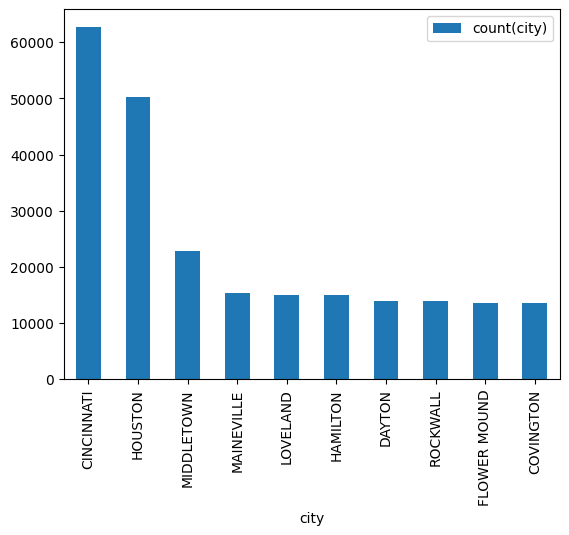

In [116]:
# plot most common cities, based on count of city, only top 10
products_transactions_store.groupBy('city').agg(count('city')).orderBy('count(city)', ascending=False).limit(10).toPandas().plot(kind='bar', x='city', y='count(city)')

In [117]:
# most common cities by units sold
products_transactions_store.groupBy('city').agg(sum('units')).orderBy('sum(units)', ascending=False).show()

+------------+----------+
|        city|sum(units)|
+------------+----------+
|  CINCINNATI|   1724057|
|     HOUSTON|    792567|
|  MIDDLETOWN|    578580|
|    ROCKWALL|    314600|
|    HAMILTON|    306494|
|  MAINEVILLE|    289646|
|      DAYTON|    288143|
|   COVINGTON|    283651|
|    LOVELAND|    272557|
|   KETTERING|    271677|
|    BLUE ASH|    268379|
|FLOWER MOUND|    238672|
|    ERLANGER|    237272|
|     LEBANON|    236132|
|    VANDALIA|    195510|
|       MASON|    193650|
|  SUGAR LAND|    193519|
| SAINT MARYS|    181490|
|    MCKINNEY|    176398|
|        KATY|    171893|
+------------+----------+
only showing top 20 rows



<AxesSubplot: xlabel='city'>

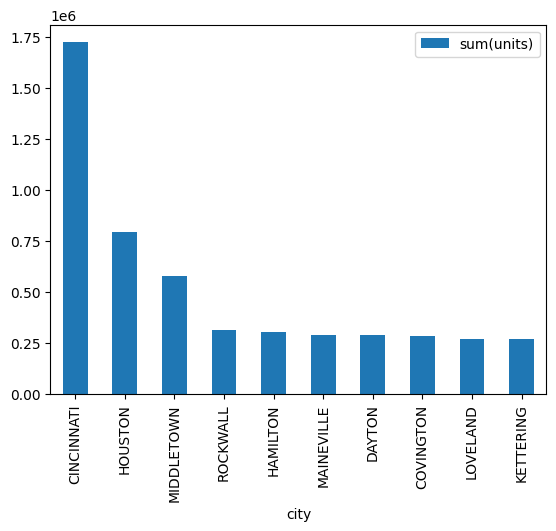

In [118]:
# plot # most common cities by units sold, only top 10
products_transactions_store.groupBy('city').agg(sum('units')).orderBy('sum(units)', ascending=False).limit(10).toPandas().plot(kind='bar', x='city', y='sum(units)')

<AxesSubplot: ylabel='Frequency'>

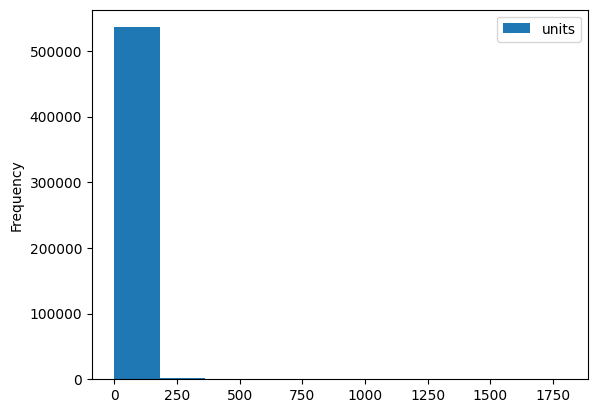

In [119]:
# watch distribution of units sold
products_transactions_store.select('units').toPandas().plot(kind='hist')

<AxesSubplot: ylabel='Frequency'>

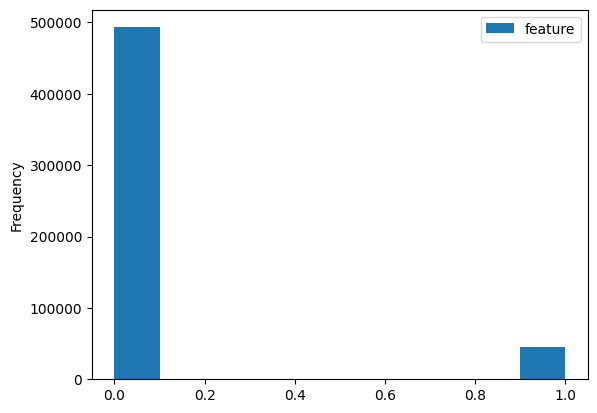

In [120]:
# plot the 'feature' column
products_transactions_store.select('feature').toPandas().plot(kind='hist')

In [121]:
# iterate through feature column column
distinct_features = {}
for i in products_transactions_store.select('feature').collect():
    if i.feature in distinct_features:
        distinct_features[i.feature] += 1
    else:
        distinct_features[i.feature] = 1

# print distinct features
print(distinct_features)

{0: 493145, 1: 45498, None: 3}


In [122]:
# correlation matrix of all variables
products_transactions_store.toPandas().corr()

/tmp/ipykernel_80098/3957219607.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  products_transactions_store.toPandas().corr()


,units,visits,hhs,spend,price,base_price,feature,display,tpr_only,msa,parking,size,avg_weekly_baskets
units,1.000000,0.986745,0.984880,0.903465,-0.282472,-0.219716,0.302062,0.307089,-0.024255,-0.058527,0.155554,0.171274,0.177501
visits,0.986745,1.000000,0.998661,0.903685,-0.285183,-0.225363,0.291350,0.308061,-0.033792,-0.060665,0.163039,0.180457,0.187576
hhs,0.984880,0.998661,1.000000,0.899327,-0.287296,-0.226836,0.292185,0.310093,-0.032099,-0.059954,0.164080,0.185217,0.189120
spend,0.903465,0.903685,0.899327,1.000000,-0.059148,0.013776,0.354158,0.303356,-0.073387,-0.061609,0.177201,0.196368,0.207741
price,-0.282472,-0.285183,-0.287296,-0.059148,1.000000,0.953582,-0.010460,-0.069202,-0.181578,0.002639,0.015926,0.027197,0.015764
base_price,-0.219716,-0.225363,-0.226836,0.013776,0.953582,1.000000,0.155142,0.045245,-0.050318,0.000998,0.014697,0.023692,0.012424
feature,0.302062,0.291350,0.292185,0.354158,-0.010460,0.155142,1.000000,0.406791,-0.119401,0.014877,-0.024850,-0.019300,-0.014464
display,0.307089,0.308061,0.310093,0.303356,-0.069202,0.045245,0.406791,1.000000,-0.138463,-0.003153,0.022799,0.036096,0.020208
tpr_only,-0.024255,-0.033792,-0.032099,-0.073387,-0.181578,-0.050318,-0.119401,-0.138463,1.000000,-0.019800,0.009286,-0.008333,-0.009105
msa,-0.058527,-0.060665,-0.059954,-0.061609,0.002639,0.000998,0.014877,-0.003153,-0.019800,1.000000,-0.332207,-0.140646,-0.050604


/tmp/ipykernel_80098/2665655289.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(products_transactions_store.toPandas().corr(), annot=True, fmt='.2f', cmap='coolwarm')


<AxesSubplot: >

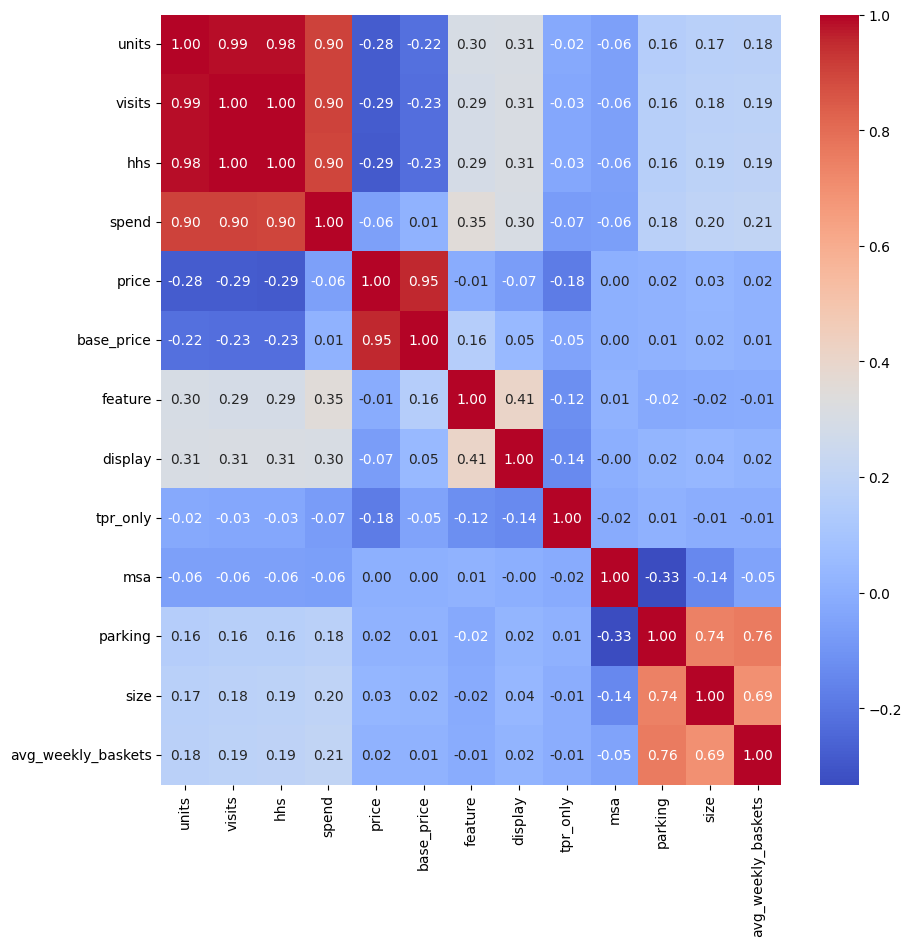

In [123]:
# plot the correlation matrix using seaborn, increase figure size
plt.figure(figsize=(10,10))
sns.heatmap(products_transactions_store.toPandas().corr(), annot=True, fmt='.2f', cmap='coolwarm')

In [124]:
# select distinct 'category'
products_transactions_store.select('category').distinct().show()

+--------------------+
|            category|
+--------------------+
|         COLD CEREAL|
|        FROZEN PIZZA|
|ORAL HYGIENE PROD...|
|          BAG SNACKS|
+--------------------+



In [125]:
# check how many categorical variables there are in the data, loop through columns if distinct count is less than 10 then it is categorical
categorical_variables = set()
continous_variables = set()
for i in products_transactions_store.columns:
    if products_transactions_store.select(i).distinct().count() < 10:
        categorical_variables.add(i)
    else:
        continous_variables.add(i)

# print categorical variables
print(categorical_variables)

# print continous variables
print(continous_variables)

{'segment', 'category', 'feature', 'state', 'sub_category', 'tpr_only', 'display'}
{'hhs', 'manufacturer', 'base_price', 'parking', 'units', 'store_name', 'week_end_date', 'msa', 'size', 'avg_weekly_baskets', 'description', 'spend', 'price', 'visits', 'product_size', 'city'}


In [126]:
# distribution of category column
products_transactions_store.groupBy('category').agg(count('category')).orderBy('count(category)', ascending=False).show()

+--------------------+---------------+
|            category|count(category)|
+--------------------+---------------+
|         COLD CEREAL|         174140|
|          BAG SNACKS|         130183|
|ORAL HYGIENE PROD...|         119905|
|        FROZEN PIZZA|         114418|
+--------------------+---------------+



<AxesSubplot: xlabel='category'>

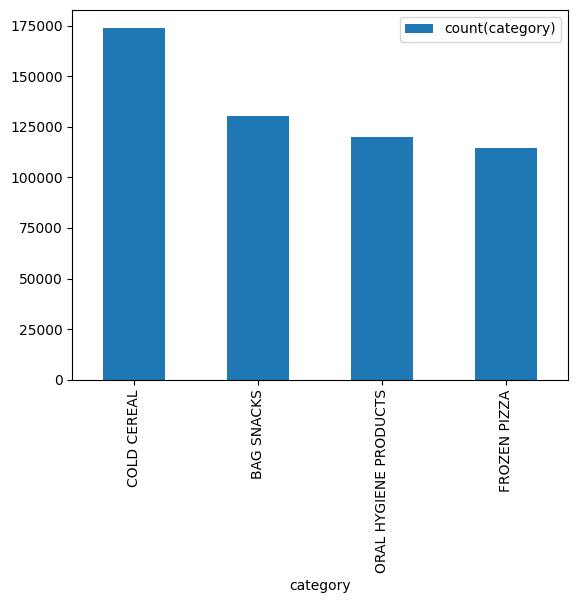

In [127]:
# plot distribution of category column
products_transactions_store.groupBy('category').agg(count('category')).orderBy('count(category)', ascending=False).toPandas().plot(kind='bar', x='category', y='count(category)')

In [128]:
# remove _c9 column
# products_transactions_store = products_transactions_store.drop('_c9')

In [129]:
# Train a model to predict category based on price, product_size, units
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline

In [141]:
# head of product_size
products_transactions_store.select('product_size').show(5)

+------------+
|product_size|
+------------+
|       15 OZ|
|       15 OZ|
|       15 OZ|
|       15 OZ|
|       15 OZ|
+------------+
only showing top 5 rows



In [154]:
# new column of numeric product_size
products_transactions_store = products_transactions_store.withColumn('product_size_num', regexp_replace('product_size', 'OZ', '').cast('integer'))

# head of product_size
products_transactions_store.select('product_size_num').show(5)

+----------------+
|product_size_num|
+----------------+
|              15|
|              15|
|              15|
|              15|
|              15|
+----------------+
only showing top 5 rows



In [155]:
# replace any non float value with 0 in product_size_num
products_transactions_store = products_transactions_store.withColumn('product_size_num', when(products_transactions_store.product_size_num.isNull(), 0).otherwise(products_transactions_store.product_size_num))

In [156]:
# create a string indexer for the category column
indexer = StringIndexer(inputCol='category', outputCol='category_index')

# create a vector assembler for the features
assembler = VectorAssembler(inputCols=['price', 'product_size_num', 'units'], outputCol='features')

In [157]:
# create a random forest classifier
rf = RandomForestClassifier(labelCol='category_index', featuresCol='features')

# create a pipeline
pipeline = Pipeline(stages=[indexer, assembler, rf])

In [158]:
# split the data into train and test
train, test = products_transactions_store.randomSplit([0.7, 0.3])

# schema of train
train.printSchema()

root
 |-- description: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- category: string (nullable = true)
 |-- sub_category: string (nullable = true)
 |-- product_size: string (nullable = true)
 |-- week_end_date: string (nullable = true)
 |-- units: integer (nullable = true)
 |-- visits: integer (nullable = true)
 |-- hhs: integer (nullable = true)
 |-- spend: double (nullable = true)
 |-- price: double (nullable = true)
 |-- base_price: double (nullable = true)
 |-- feature: integer (nullable = true)
 |-- display: integer (nullable = true)
 |-- tpr_only: integer (nullable = true)
 |-- store_name: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- msa: integer (nullable = true)
 |-- segment: string (nullable = true)
 |-- parking: integer (nullable = true)
 |-- size: integer (nullable = true)
 |-- avg_weekly_baskets: integer (nullable = true)
 |-- product_size_num: integer (nullable = true)



In [160]:
# check for any non numeric values in the train data
train.select([count(when(~col(c).cast("float").isNotNull(), c)).alias(c) for c in train.columns]).show()

+-----------+------------+--------+------------+------------+-------------+-----+------+---+-----+-----+----------+-------+-------+--------+----------+------+------+---+-------+-------+----+------------------+----------------+
|description|manufacturer|category|sub_category|product_size|week_end_date|units|visits|hhs|spend|price|base_price|feature|display|tpr_only|store_name|  city| state|msa|segment|parking|size|avg_weekly_baskets|product_size_num|
+-----------+------------+--------+------------+------------+-------------+-----+------+---+-----+-----+----------+-------+-------+--------+----------+------+------+---+-------+-------+----+------------------+----------------+
|     377086|      377086|  377086|      377086|      377086|       377086|    3|     3|  3|    3|   21|       129|      3|      3|       3|    377086|377086|377086|  3| 377086| 256278|   3|                 3|               0|
+-----------+------------+--------+------------+------------+-------------+-----+------+---+

In [161]:
# drop any null values from train
train = train.dropna()

# shape of train
print((train.count(), len(train.columns)))

(120727, 24)


In [168]:
# drop any null values from test
test = test.dropna()

# shape of test
print((test.count(), len(test.columns)))

(51739, 24)


In [169]:
# fit the pipeline to the training data
model = pipeline.fit(train)

In [170]:
# transform the test data
results = model.transform(test)

In [171]:
# head of results
results.select('category', 'category_index', 'prediction').show(10)

+--------------------+--------------+----------+
|            category|category_index|prediction|
+--------------------+--------------+----------+
|ORAL HYGIENE PROD...|           2.0|       2.0|
|ORAL HYGIENE PROD...|           2.0|       2.0|
|ORAL HYGIENE PROD...|           2.0|       2.0|
|ORAL HYGIENE PROD...|           2.0|       2.0|
|ORAL HYGIENE PROD...|           2.0|       2.0|
|ORAL HYGIENE PROD...|           2.0|       2.0|
|ORAL HYGIENE PROD...|           2.0|       2.0|
|ORAL HYGIENE PROD...|           2.0|       2.0|
|ORAL HYGIENE PROD...|           2.0|       2.0|
|ORAL HYGIENE PROD...|           2.0|       2.0|
+--------------------+--------------+----------+
only showing top 10 rows



In [172]:
# score the model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [173]:
# create an evaluator
evaluator = MulticlassClassificationEvaluator(labelCol='category_index', predictionCol='prediction', metricName='accuracy')

# evaluate the model
accuracy = evaluator.evaluate(results)

In [174]:
# print the accuracy
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.9744100195210577


In [175]:
# confusion matrix
results.groupBy('category_index', 'prediction').count().show()

+--------------+----------+-----+
|category_index|prediction|count|
+--------------+----------+-----+
|           1.0|       1.0|11103|
|           0.0|       1.0|  113|
|           2.0|       2.0|10973|
|           1.0|       0.0| 1169|
|           0.0|       0.0|17633|
|           3.0|       3.0|10706|
|           3.0|       0.0|   42|
+--------------+----------+-----+



<AxesSubplot: xlabel='category_index'>

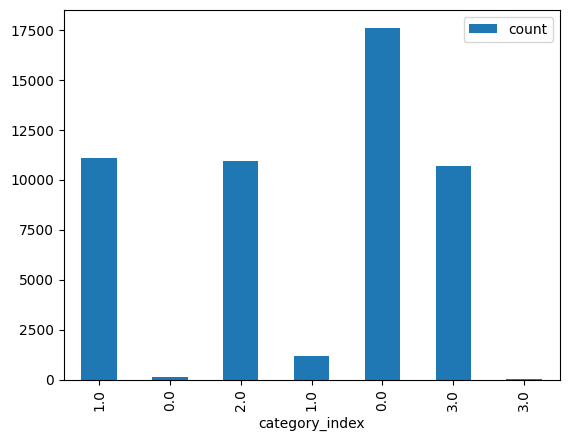

In [176]:
# plot confusion matrix
results.groupBy('category_index', 'prediction').count().toPandas().plot(kind='bar', x='category_index', y='count')

In [177]:
# True Positive, Negative, False Positive, Negative
tp = results.filter('category_index == 0 AND prediction == 0').count()
tn = results.filter('category_index == 1 AND prediction == 1').count()
fp = results.filter('category_index == 1 AND prediction == 0').count()
fn = results.filter('category_index == 0 AND prediction == 1').count()

# print confusion matrix
print('True Positive: {}'.format(tp))
print('True Negative: {}'.format(tn))
print('False Positive: {}'.format(fp))
print('False Negative: {}'.format(fn))

True Positive: 17633
True Negative: 11103
False Positive: 1169
False Negative: 113


In [178]:
# recall, precision, f1 score
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1 = 2 * (precision * recall) / (precision + recall)

# print recall, precision, f1 score
print('Recall: {}'.format(recall))
print('Precision: {}'.format(precision))
print('F1 Score: {}'.format(f1))

Recall: 0.9936323678575454
Precision: 0.9378257632166791
F1 Score: 0.9649228411951406
